In [79]:
!pip install eli5

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eli5

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from eli5.sklearn import PermutationImportance

In [87]:
dados = pd.read_csv('dataset_airbnb.csv', sep=';')

In [88]:
dados.head()

,room_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,property_type
0,3732200,Shared room,Sao Paulo,SAO PAULO,Mooca,0,0.0,5,1.0,47.0,House
1,2247926,Shared room,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,16,1.0,21.0,Bed & Breakfast
2,2674673,Shared room,Sao Paulo,SAO PAULO,Itaquera,0,0.0,8,1.0,311.0,House
3,2996011,Shared room,Sao Paulo,SAO PAULO,Penha,0,0.0,5,1.0,389.0,Apartment
4,2939182,Shared room,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,4,1.0,311.0,House


In [89]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               11118 non-null  int64  
 1   room_type             11118 non-null  object 
 2   city                  11118 non-null  object 
 3   borough               11118 non-null  object 
 4   neighborhood          11118 non-null  object 
 5   reviews               11118 non-null  int64  
 6   overall_satisfaction  11118 non-null  float64
 7   accommodates          11118 non-null  int64  
 8   bedrooms              11118 non-null  float64
 9   price                 11118 non-null  float64
 10  property_type         11118 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 955.6+ KB


In [90]:
#Checando duplicatas
dados.duplicated().sum()

0

In [91]:
#alterando index
dados.set_index("room_id")

,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,property_type
room_id,,,,,,,,,,
3732200,Shared room,Sao Paulo,SAO PAULO,Mooca,0,0.0,5,1.0,47.0,House
2247926,Shared room,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,16,1.0,21.0,Bed & Breakfast
2674673,Shared room,Sao Paulo,SAO PAULO,Itaquera,0,0.0,8,1.0,311.0,House
2996011,Shared room,Sao Paulo,SAO PAULO,Penha,0,0.0,5,1.0,389.0,Apartment
2939182,Shared room,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,4,1.0,311.0,House
...,...,...,...,...,...,...,...,...,...,...
10342014,Private room,Sao Paulo,SAO PAULO,Ipiranga,63,5.0,2,1.0,19.0,Apartment
11454902,Private room,Sao Paulo,SAO PAULO,Itaim Bibi,49,5.0,1,1.0,19.0,Apartment
18272477,Private room,Sao Paulo,SAO PAULO,Jardim Paulista,13,5.0,2,1.0,19.0,Apartment


In [92]:
#Descrevendo os dados para melhor viasualização da case.
dados.describe()

,room_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.111800e+04,11118.000000,11118.000000,11118.000000,11118.000000,11118.000000
mean,1.097865e+07,6.164598,1.752339,3.040295,1.317143,84.027613
std,6.087036e+06,14.204120,2.322813,2.345101,0.897948,223.382397
min,1.077400e+04,0.000000,0.000000,1.000000,0.000000,3.000000
25%,4.758136e+06,0.000000,0.000000,2.000000,1.000000,25.000000
50%,1.233381e+07,1.000000,0.000000,2.000000,1.000000,43.000000
75%,1.646424e+07,6.000000,4.500000,4.000000,2.000000,72.000000
max,1.962464e+07,248.000000,5.000000,16.000000,10.000000,10905.000000


In [93]:
#Dropando coluna cidade, pois existe apenas a cidade de são paulo
dados.drop(['city'], axis=1, inplace=True)

In [94]:
#Analizando as colunas categorizaveis
categori = ["room_type", "borough", "neighborhood"]

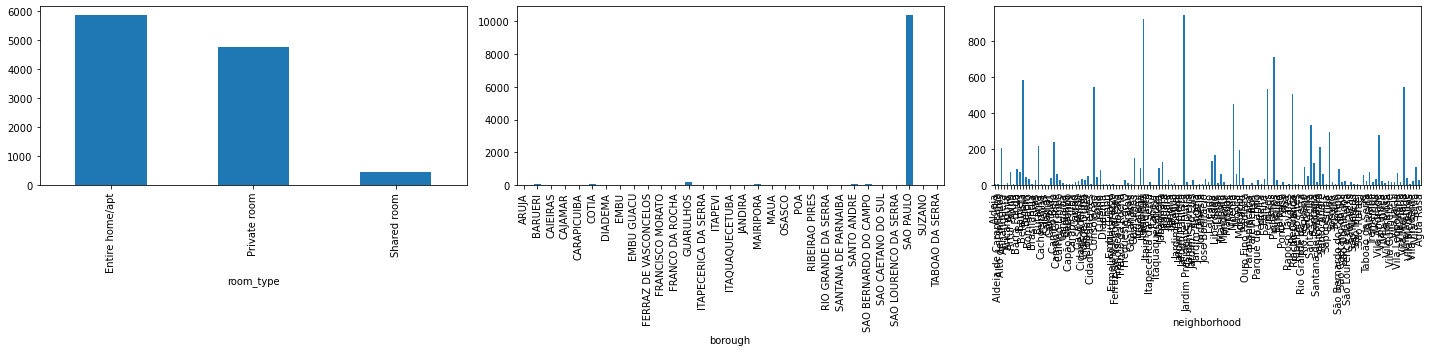

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = len(categori), figsize=(20,5) )

for plotNumber, colName in enumerate(categori):
    dados.groupby(colName).size().plot(kind='bar', ax = axes[plotNumber])

plt.tight_layout()


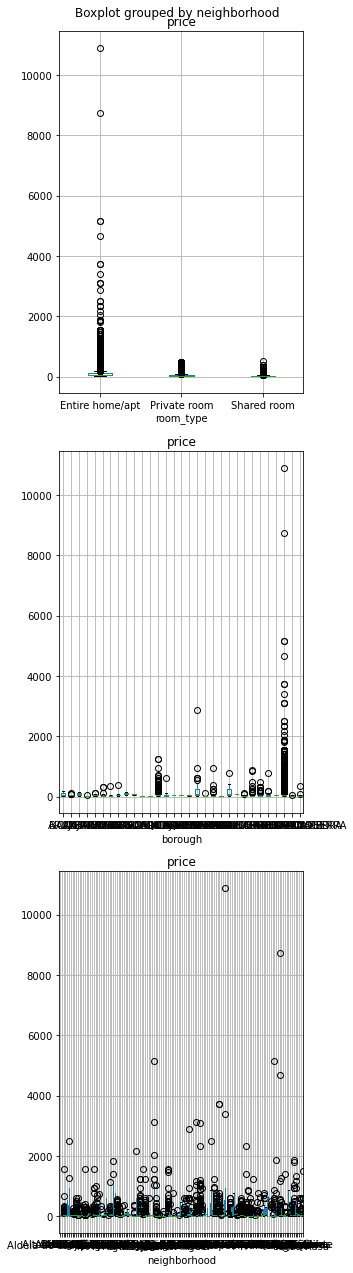

In [14]:
fig, axes = plt.subplots(nrows = len(categori), ncols = 1, figsize=(5, 18) )

for plotNumber, colName in enumerate(categori):
    dados.boxplot(column='price', by= colName, vert= True, figsize=(5,5), ax=axes[plotNumber] )

plt.tight_layout()

In [95]:
#alterando tipo de dados das colunas
for i in categori:
    dados[i] = dados[i].astype('category')

In [16]:
#dados alterados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_id               11118 non-null  int64   
 1   room_type             11118 non-null  category
 2   borough               11118 non-null  category
 3   neighborhood          11118 non-null  category
 4   reviews               11118 non-null  int64   
 5   overall_satisfaction  11118 non-null  float64 
 6   accommodates          11118 non-null  int64   
 7   bedrooms              11118 non-null  float64 
 8   price                 11118 non-null  float64 
 9   property_type         11118 non-null  object  
dtypes: category(3), float64(3), int64(3), object(1)
memory usage: 659.2+ KB


In [97]:
#normalizando dados categoricos
dados = pd.get_dummies(dados, drop_first=True)

In [98]:
dados.head()

,room_id,reviews,overall_satisfaction,accommodates,bedrooms,price,room_type_Private room,room_type_Shared room,borough_BARUERI,borough_CAIEIRAS,...,property_type_Other,property_type_Plane,property_type_Pousada,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa
0,3732200,0,0.0,5,1.0,47.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2247926,0,0.0,16,1.0,21.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2674673,0,0.0,8,1.0,311.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2996011,0,0.0,5,1.0,389.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2939182,0,0.0,4,1.0,311.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
#Separando amostras e variavel preditora
y = dados['price']
del dados['price']
X = dados

In [101]:
#separando de dados treino teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

# Normalizando os dados com StandardScaler

In [21]:
sc = StandardScaler()
sc.fit(X_train, y_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# RandomForest

In [22]:
#Instanciando modelo
rf = RandomForestRegressor()

In [23]:
#Treinando modelo
rf.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
#Rodando o modelo na amostra de treino
y_pred = rf.predict(X_test)

In [25]:
#Calculando o erro medio quadratico ou RMSE do modelo de treino
print('MSE (Treino)', mean_squared_error(y_train, rf.predict(X_train)))
print('RMSE (Treino)', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))

MSE (Treino) 6453.479753697691
RMSE (Treino) 80.33355310016911


In [26]:
#Calculando o erro medio quadratico ou RMSE do modelo de treste
print('MSE (Teste)', mean_squared_error(y_test, y_pred))
print('RMSE (Teste)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Teste) 29443.698013333327
RMSE (Teste) 171.59166067537586


Otimização de hiper parametros

In [27]:
#Declarando Parametros
params = {
    'n_estimators' : [int(x) for x in np.linspace(100, 2000, num=20)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(5, 30, num=5)],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 2, 4, 5, 10]
}

In [29]:
#declarando algoritimos de RandomSearch
grid_rf = RandomizedSearchCV(rf, param_distributions=params, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=2)

In [30]:
#Treinando modelos
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23, total=  18.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.5s remaining:    0.0s


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23, total=  21.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23, total=  19.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23, total=  20.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=23, total=  19.2s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=2, max_features=auto, max_depth=30, total= 1.1min
[CV] n_estimators=900, min_samples_s

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11, total=   1.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11, total=   1.4s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11, total=   2.0s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11, total=   1.9s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=11, total=   1.7s
[CV] n_estimators=300, min_samples_split=2,

[CV]  n_estimators=1900, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total= 3.0min
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total= 1.4min
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total= 1.4min
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total= 1.5min
[CV] n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=900, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=17, total= 1.3min
[CV] n_estimators=900, min_samples_split=2, min_sa

[CV]  n_estimators=1000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=11, total=   9.7s
[CV] n_estimators=1000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=11 
[CV]  n_estimators=1000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=11, total=   9.8s
[CV] n_estimators=2000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=23, total=  26.2s
[CV] n_estimators=2000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=23, total=  26.4s
[CV] n_estimators=2000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=20, min_samples_leaf=2, max_features=sqrt, max_depth=23, total=  26.3s
[CV] n_estimators=2000, min_sample

[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=400, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=20, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   4.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=  13.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=23 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=23, total=  13.9s
[CV] n_estimators=900, min_samples_split=10

[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11, total= 1.5min
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11, total= 1.6min
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11, total= 1.6min
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11 
[CV]  n_estimators=1400, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=11, total= 1.6min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=11, total=  16.6s
[CV] n_estimators=1600, min_sample

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11, total=   1.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11, total=   1.0s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=11, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samp

[CV]  n_estimators=1400, min_samples_split=20, min_samples_leaf=5, max_features=auto, max_depth=11, total= 1.5min
[CV] n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  25.3s
[CV] n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  26.1s
[CV] n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  24.1s
[CV] n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1500, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  25.5s
[CV] n_estimators=1500, min_sample

[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=5, total=  53.2s
[CV] n_estimators=1100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=5 
[CV]  n_estimators=1100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=5, total=  52.1s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  11.2s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  10.4s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  10.0s
[CV] n_estimators=1600, min_samples_split=5, min_sam

[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=11, total=  46.5s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=11 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=11, total=  47.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=11 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=11, total=   2.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=11 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=11, total=   2.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=11 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=11, total=   1.9s
[CV] n_estimators=200, min_samples_split=2, min_samp

[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, total= 2.7min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, total= 2.7min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=30, total= 2.7min
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17, total= 1.1min
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=17, total= 1.0min
[CV] n_estimators=800, min_samples_split=5

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   8.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   8.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   8.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   8.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=23 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=23, total= 2.9min
[CV] n_estimators=2000, min_samples_split=10, mi

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.7s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=  52.8s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=  52.6s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=  54.1s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=30, total=  53.9s
[CV] n_estimators=1300, min_samples_split=2

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 414.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 11, 17, 23, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
                                                         2000]},
                   scoring='neg_mean_squared_error', verbose=2)

In [32]:
#Selecionando os melhores parametros
best_rf = grid_rf.best_estimator_

In [33]:
#treinando o modelo com os melhores parametros
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=20)

In [34]:
#Rodando o modelo com o melhor parametro
y_pred = best_rf.predict(X_test)

In [35]:
#Calculando o erro medio quadratico ou RMSE do modelo de treino com hiper parametros
print('MSE (Treino)', mean_squared_error(y_train, best_rf.predict(X_train)))
print('RMSE (Treino)', np.sqrt(mean_squared_error(y_train, best_rf.predict(X_train))))

MSE (Treino) 32688.24391953001
RMSE (Treino) 180.7989046413999


In [36]:
#Calculando o erro medio quadratico ou RMSE do modelo de teste com hiper parametros
print('MSE (Teste)', mean_squared_error(y_test, y_pred))
print('RMSE (Teste)', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE (Teste) 18591.68734586836
RMSE (Teste) 136.35133789541032


In [63]:
score_cross_test = cross_val_score(best_rf, X_test, y_test, cv=5, scoring='neg_mean_squared_error').mean()

In [64]:
score_cross_train = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()

In [68]:
print(f'RMSE(teste) Cross Validation {np.sqrt(-score_cross_test)}')
print(f'RMSE(treino) Cross Validation {np.sqrt(-score_cross_train)}')

RMSE(teste) Cross Validation 196.75877986463385
RMSE(treino) Cross Validation 197.10543918370155


# Arvore de Regressão

In [56]:
#treinando modelo com max_depth none
rt = DecisionTreeRegressor(random_state=42, max_depth=None)

In [57]:
#Treinando o modelo com dados de treino
rt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [58]:
#Calculando o erro medio quadratico ou RMSE do modelo de treino
print('MSE (treino)', mean_squared_error(y_train, rt.predict(X_train)))
print('RMSE (treino)', np.sqrt(mean_squared_error(y_train, rt.predict(X_train))))

MSE (treino) 0.0
RMSE (treino) 0.0


In [59]:
#Calculando o erro medio quadratico ou RMSE do modelo de treste
print('MSE (teste)', mean_squared_error(y_test, rt.predict(X_test)))
print('RMSE (teste)', np.sqrt(mean_squared_error(y_test, rt.predict(X_test))))

MSE (teste) 35181.6
RMSE (teste) 187.5675878183648


# Verificando melhor profundidade

In [37]:
max_depth = (3, 6, 9, 12, 15, None)

In [38]:
#Buscando melhor resultado com Validação cruzada
rmse = []
menor = 100000
best_max_depth = 0
best_i = 0

for i, md in enumerate(max_depth):
  dt = DecisionTreeRegressor(random_state=42, max_depth=md)
  score = cross_val_score(dt, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
  print("i = ", i, " md = ", md ,  " score = ", np.sqrt(-score))
  rmse.append(np.sqrt(-score))
  if np.sqrt(-score) < menor:
    menor = np.sqrt(-score)
    best_max_depth = md
    best_i = i

print('\n *** O melhor desempenho foi com max_depth = ', best_max_depth,  " RMSE = ", menor)

i =  0  md =  3  score =  211.3066165676733
i =  1  md =  6  score =  214.15614768350923
i =  2  md =  9  score =  221.22002860956914
i =  3  md =  12  score =  251.58478456667018
i =  4  md =  15  score =  248.70925248155814
i =  5  md =  None  score =  255.34316123561098

 *** O melhor desempenho foi com max_depth =  3  RMSE =  211.3066165676733


In [39]:
#treinando modelo com a melhor profundidade.
rt = DecisionTreeRegressor(random_state=42, max_depth=3)

In [40]:
#treinando o modelo com a melhor profundidade
rt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [69]:
y_pred_rt = rf.predict(X_test)

In [41]:
#Calculando o erro medio quadratico ou RMSE do modelo de treino
print('MSE (treino)', mean_squared_error(y_train, rt.predict(X_train)))
print('RMSE (treino)', np.sqrt(mean_squared_error(y_train, rt.predict(X_train))))

MSE (treino) 31518.552082835275
RMSE (treino) 177.53465037235767


In [42]:
#Calculando o erro medio quadratico ou RMSE do modelo de treste
print('MSE (teste)', mean_squared_error(y_test, rt.predict(X_test)))
print('RMSE (teste)', np.sqrt(mean_squared_error(y_test, rt.predict(X_test))))

MSE (teste) 32261.583458579385
RMSE (teste) 179.6150980808111


# Regressão linear multipla

In [43]:
#instanciando o modelo 
lin_reg = LinearRegression()

In [44]:
#Treinando modelo com variaveis de treino
lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
#Ponto de interceptação da analise
lin_reg.intercept_

83.97275612614891

In [46]:
#Coeficiente de determinação
lin_reg.score(X_test,y_test)

0.5464677613238145

In [70]:
y_pred_lin = lin_reg.predict(X_test)

In [47]:
#Calculando o erro medio quadratico ou RMSE do modelo de treino
print('MSE (treino)', mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE (treino)', np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))))

MSE (treino) 39518.02893726675
RMSE (treino) 198.7914206832547


In [48]:
#Calculando o erro medio quadratico ou RMSE do modelo de treste
print('MSE (teste)', mean_squared_error(y_test, lin_reg.predict(X_test)))
print('RMSE (teste)', np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test))))

MSE (teste) 15730.780312300074
RMSE (teste) 125.42240753669208


# analise de residuos

In [71]:
#filtrando residuos
res_rt = y_test - y_pred_rt
res_lin = y_test - y_pred_lin
res_rf = y_test - y_pred

Regressão Linear

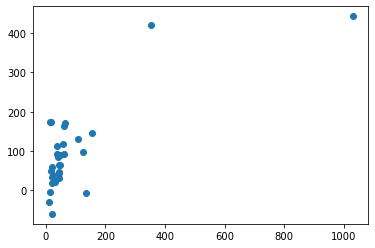

In [72]:
plt.scatter(y_test, y_pred_lin)

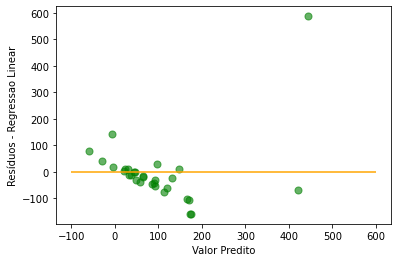

In [73]:
plt.scatter(y=res_lin, x=y_pred_lin, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-100, xmax=600, color='orange')
plt.ylabel('Resíduos - Regressao Linear')
plt.xlabel('Valor Predito')
plt.show()

Arvore de regressão

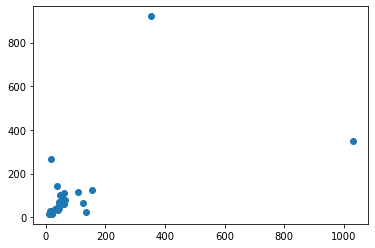

In [74]:
plt.scatter(y_test, y_pred_rt)

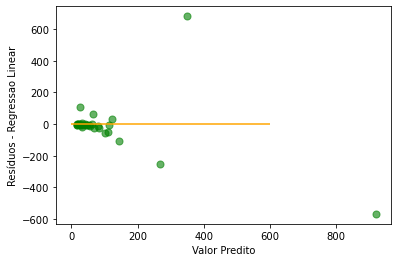

In [75]:
plt.scatter(y=res_rt, x=y_pred_rt, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=0, xmax=600, color='orange')
plt.ylabel('Resíduos - Regressao Linear')
plt.xlabel('Valor Predito')
plt.show()

RandomForest

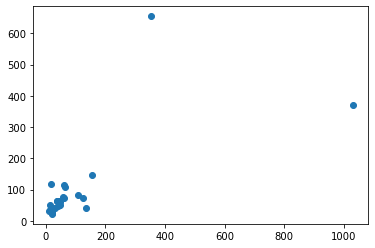

In [76]:
plt.scatter(y_test, y_pred)

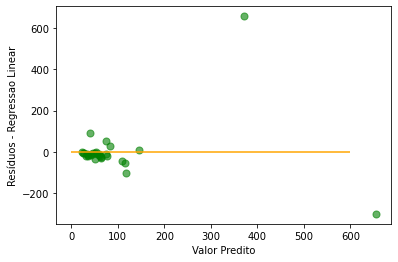

In [77]:
plt.scatter(y=res_rf, x=y_pred, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=0, xmax=600, color='orange')
plt.ylabel('Resíduos - Regressao Linear')
plt.xlabel('Valor Predito')
plt.show()

# ELI5

In [81]:
perm_lin_reg  = PermutationImportance(lin_reg).fit(X_train, y_train)
perm_rt  = PermutationImportance(rt).fit(X_train, y_train)
perm_best_rf = PermutationImportance(best_rf).fit(X_train, y_train)

In [102]:
#ELI5 Regressão Linear
eli5.show_weights(perm_lin_reg, feature_names = list(dados.columns))

Weight,Feature
48051815130269916715810816.0000 ± 49195658573.4015,neighborhood_Caieiras
45675361729829282718416896.0000 ± 111603053715.2487,borough_DIADEMA
41617802631459093799239680.0000 ± 24296003999.8084,borough_CAIEIRAS
39408254757022403989078016.0000 ± 536441243334.1316,neighborhood_Diadema
35084855188733609937731584.0000 ± 21731006610.0713,neighborhood_Franco da Rocha
34444100675846682573799424.0000 ± 591172254527.2838,borough_FERRAZ DE VASCONCELOS
32965264451026172558442496.0000 ± 95189498837.8767,borough_FRANCO DA ROCHA
31493814832885875689390080.0000 ± 74391015735.1872,neighborhood_Ferraz de Vasconcelos
30579029635880884629405696.0000 ± 720164386243541131591680.0000,borough_SAO PAULO
28350122280662704972627968.0000 ± 93705123547.6788,borough_OSASCO


In [103]:
#ELI5 Arvore de Regressão
eli5.show_weights(perm_rt, feature_names = list(dados.columns))

Weight,Feature
2.0000 ± 0.7459,neighborhood_Ponte Rasa
1.4577 ± 0.5684,reviews
0.1575 ± 0.0070,accommodates
0.0349 ± 0.0080,room_id
0.0259 ± 0.0012,bedrooms
0 ± 0.0000,neighborhood_Embu-Guaçu
0 ± 0.0000,overall_satisfaction
0 ± 0.0000,neighborhood_Embu
0 ± 0.0000,neighborhood_Diadema
0 ± 0.0000,neighborhood_Cursino


In [104]:
#ELI5 Random Forest
eli5.show_weights(perm_best_rf, feature_names = list(dados.columns))

Weight,Feature
0.0987 ± 0.0138,bedrooms
0.0907 ± 0.0040,accommodates
0.0795 ± 0.0125,room_id
0.0738 ± 0.0188,room_type_Private room
0.0540 ± 0.0176,reviews
0.0381 ± 0.0024,neighborhood_Ponte Rasa
0.0246 ± 0.0117,property_type_House
0.0203 ± 0.0036,neighborhood_Vila Andrade
0.0199 ± 0.0127,overall_satisfaction
0.0100 ± 0.0011,neighborhood_Itaquera
